# Twitter Sentiment Analysis using Natural Language Processing (NLP)

The aim of this project is to classify a tweet as positive sentiment or negative (sexist/racist) sentiment. I have a data file twitter_sentiment_analysis.csv with information about the ID of the tweet, label of the tweet as 0 for positive sentiment 1 for negative sentiment and the actual text with text.

I will clean the data, tokenize it for NLP and then train a logistic regression ML model for classification.

In [1]:
# importing libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
import string
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

### Loading the dataset and cleaning it.

In [2]:
# loading the dataset.
df = pd.read_csv('twitter_sentiments.csv')
df.head()

id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation

In [3]:
# figuring out the datatype of each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [4]:
# writing a function that can remove a given "pattern" in a text using regex.
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [5]:
# removing usernames from text and creating a new column for cleaned tweets.
df['cleaned_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")
df.head()

id  label                                              tweet  \
0   1      0   @user when a father is dysfunctional and is s...   
1   2      0  @user @user thanks for #lyft credit i can't us...   
2   3      0                                bihday your majesty   
3   4      0  #model   i love u take with u all the time in ...   
4   5      0             factsguide: society now    #motivation   

                                       cleaned_tweet  
0    when a father is dysfunctional and is so sel...  
1    thanks for #lyft credit i can't use cause th...  
2                                bihday your majesty  
3  #model   i love u take with u all the time in ...  
4             factsguide: society now    #motivation

In [6]:
# removing very short words of length < 3 from tweets.
df['cleaned_tweet'] = df['cleaned_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

id  label                                              tweet  \
0   1      0   @user when a father is dysfunctional and is s...   
1   2      0  @user @user thanks for #lyft credit i can't us...   
2   3      0                                bihday your majesty   
3   4      0  #model   i love u take with u all the time in ...   
4   5      0             factsguide: society now    #motivation   

                                       cleaned_tweet  
0  when father dysfunctional selfish drags kids i...  
1  thanks #lyft credit can't cause they don't off...  
2                                bihday your majesty  
3  #model love take with time urð±!!! ððð...  
4                    factsguide: society #motivation

In [7]:
# removing special characters, numbers and punctuations.
df['cleaned_tweet'] = df['cleaned_tweet'].str.replace("[^a-zA-Z#]", " ")
df.head()

id  label                                              tweet  \
0   1      0   @user when a father is dysfunctional and is s...   
1   2      0  @user @user thanks for #lyft credit i can't us...   
2   3      0                                bihday your majesty   
3   4      0  #model   i love u take with u all the time in ...   
4   5      0             factsguide: society now    #motivation   

                                       cleaned_tweet  
0  when father dysfunctional selfish drags kids i...  
1  thanks #lyft credit can t cause they don t off...  
2                                bihday your majesty  
3  #model love take with time ur                 ...  
4                    factsguide  society #motivation

### Preprocessing/ Feature Extraction.

Features were extracted using tokenization and stemmization.

In [8]:
# tokenize the words for future analysis.
tokenized_tweet = df['cleaned_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, can, t, cause, they, d...
2                              [bihday, your, majesty]
3                 [#model, love, take, with, time, ur]
4                   [factsguide, society, #motivation]
Name: cleaned_tweet, dtype: object

In [9]:
# Stemmize: use the "root" of the words instead of the actual form.
# Eg: "replace" for "replaced", "replaces".

from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, can, t, caus, they, don...
2                              [bihday, your, majesti]
3                 [#model, love, take, with, time, ur]
4                         [factsguid, societi, #motiv]
Name: cleaned_tweet, dtype: object

In [10]:
# Looking at cleaned data before Exploratory data analysis.
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
df['cleaned_tweet'] = tokenized_tweet
df.head()

id  label                                              tweet  \
0   1      0   @user when a father is dysfunctional and is s...   
1   2      0  @user @user thanks for #lyft credit i can't us...   
2   3      0                                bihday your majesty   
3   4      0  #model   i love u take with u all the time in ...   
4   5      0             factsguide: society now    #motivation   

                                       cleaned_tweet  
0  when father dysfunct selfish drag kid into dys...  
1  thank #lyft credit can t caus they don t offer...  
2                                bihday your majesti  
3                      #model love take with time ur  
4                           factsguid societi #motiv

### Exploratory Data Analysis.

In [ ]:
#! pip3 install wordcloud

In [ ]:
# visualizing the most frequent words.
from wordcloud import WordCloud

all_words = " ".join([sentence for sentence in df['cleaned_tweet']])
wordcloud = WordCloud(random_state=42).generate(all_words)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

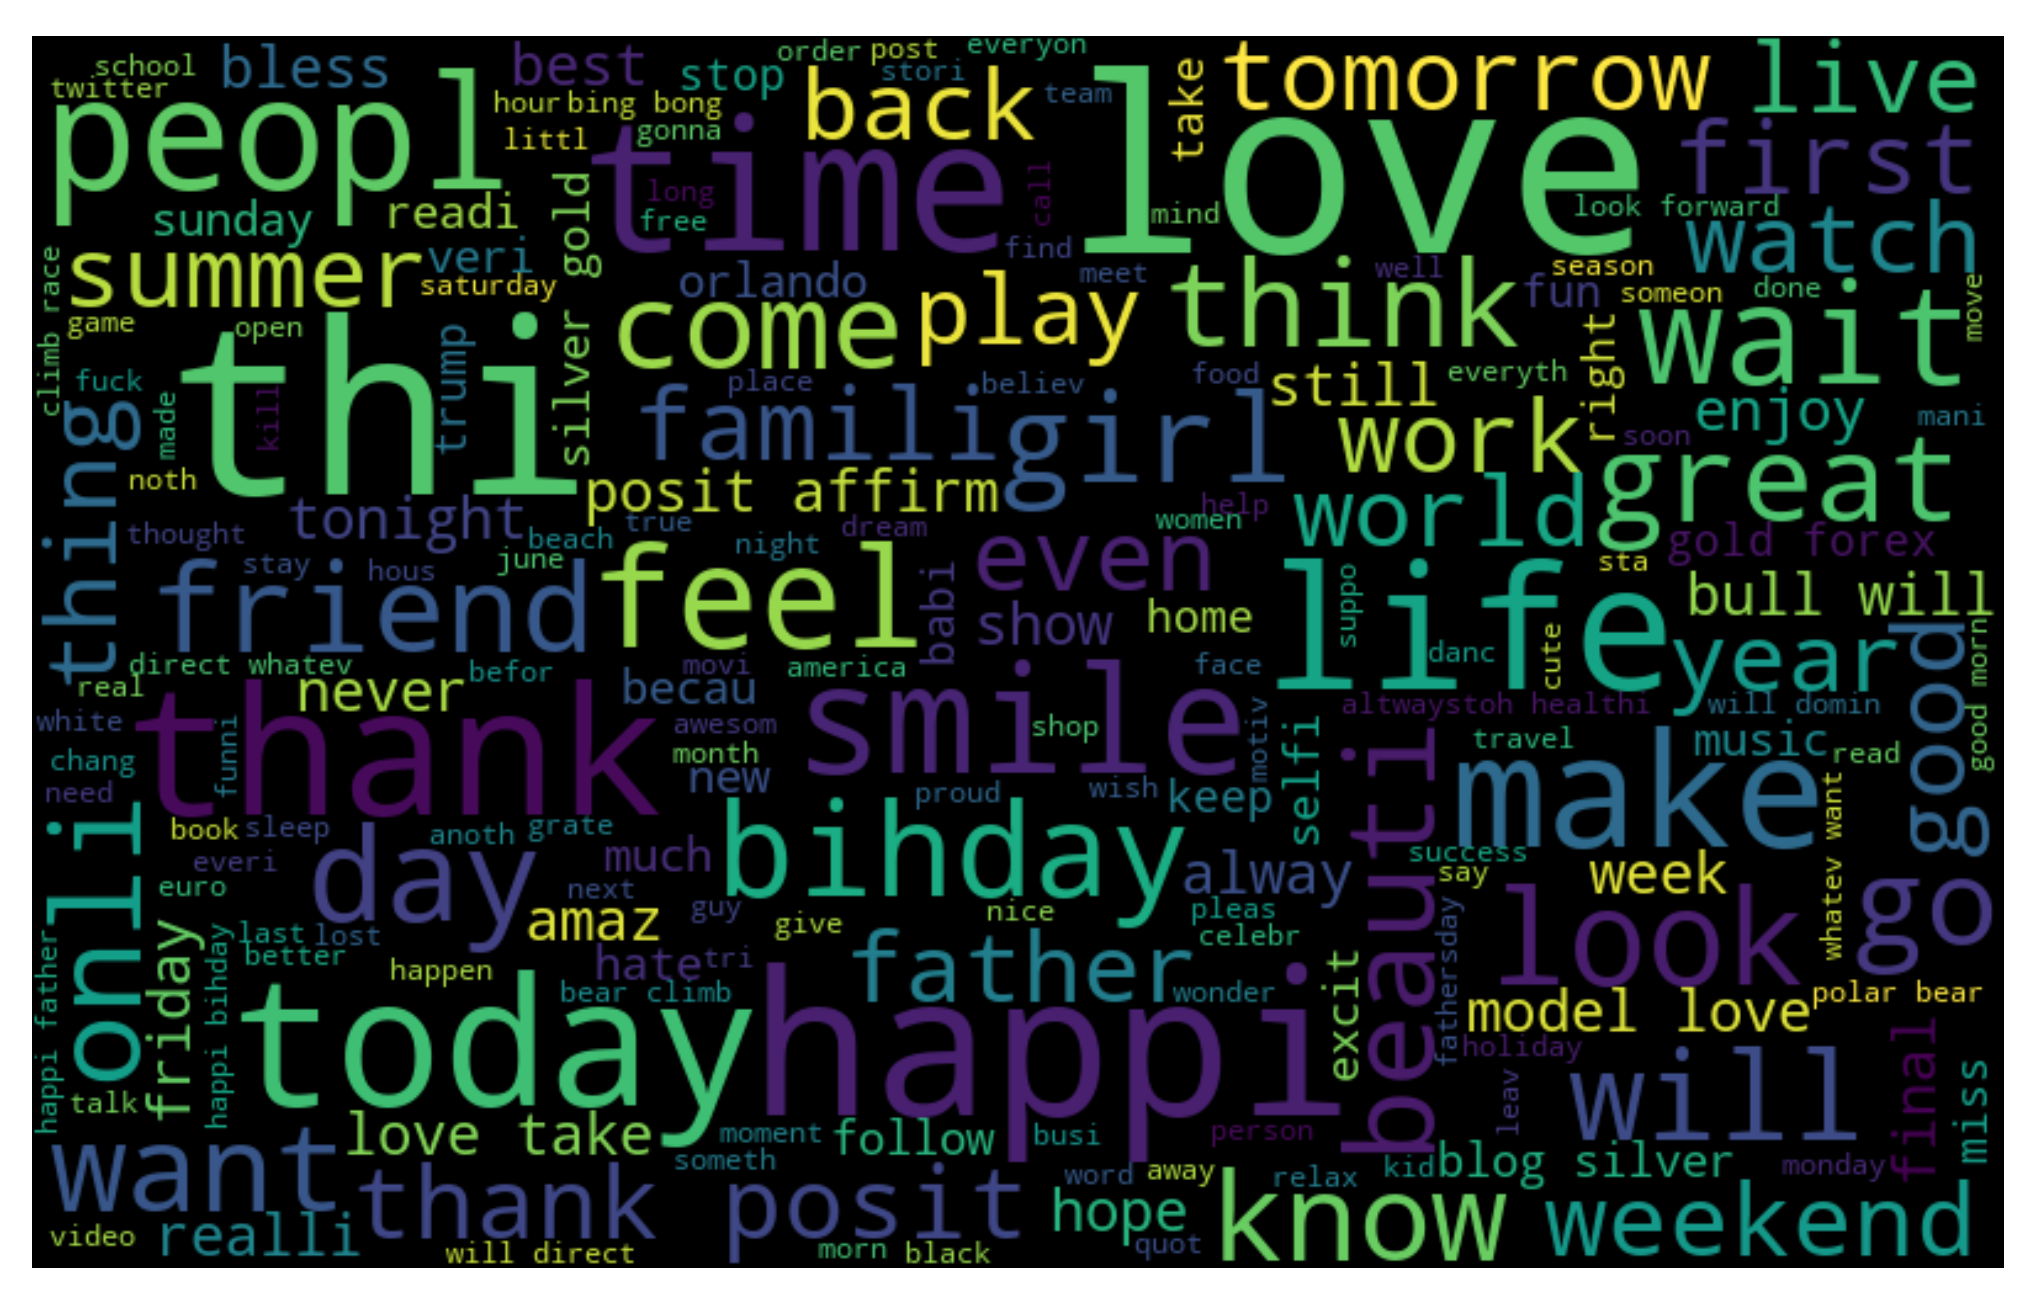

In [ ]:
# Visualizing frequent words for positive sentiment tweets.

all_words = " ".join([sentence for sentence in df['cleaned_tweet'][df['label']==0]])
wordcloud = WordCloud(random_state=42).generate(all_words)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

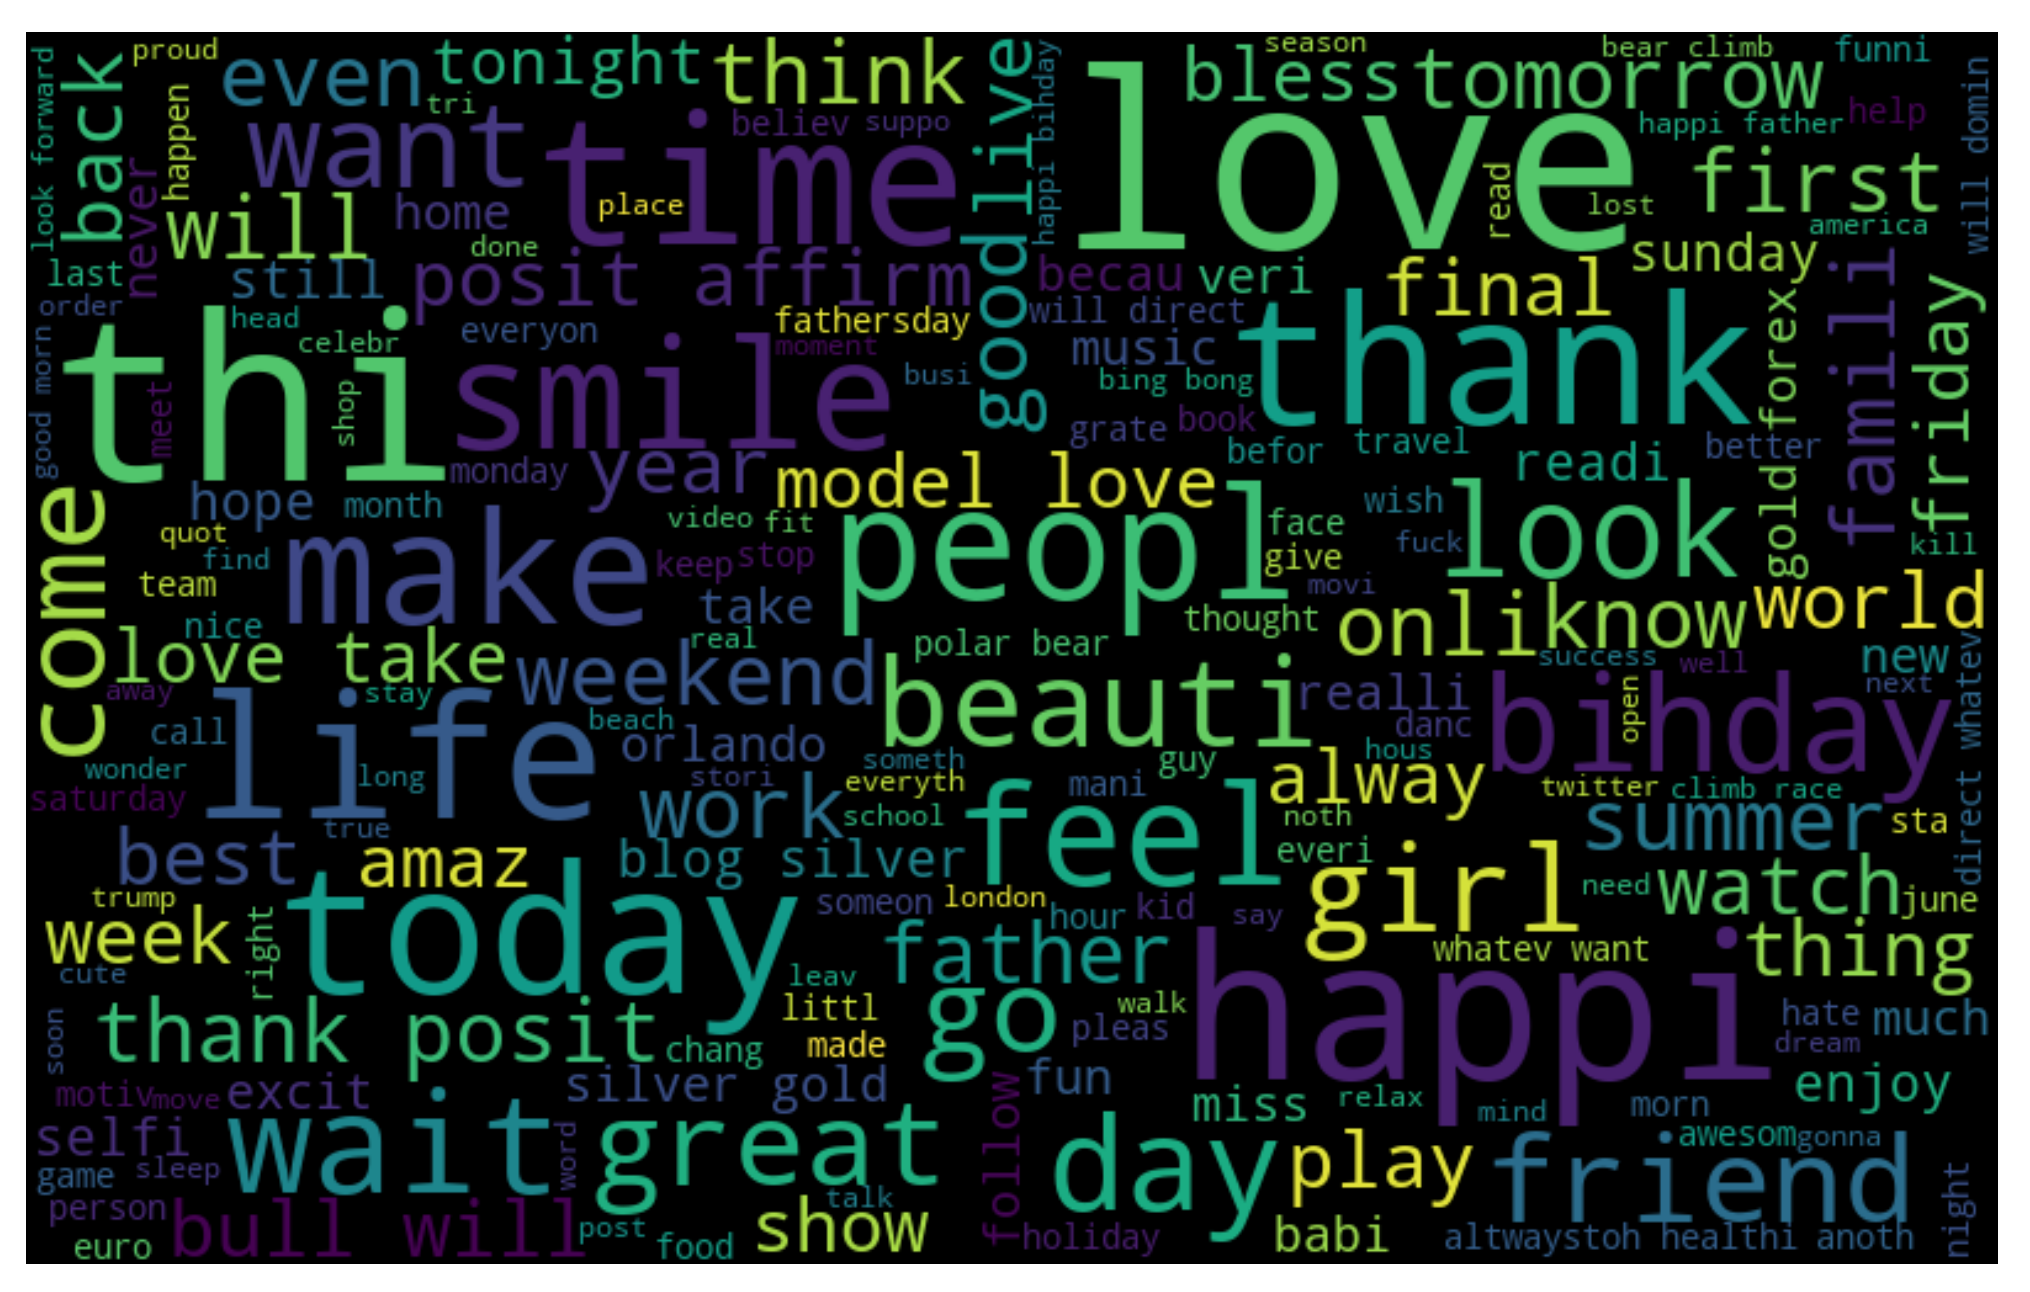

In [ ]:
# Visualizing frequent words for negative sentiment tweets.

all_words = " ".join([sentence for sentence in df['cleaned_tweet'][df['label']==1]])
wordcloud = WordCloud(random_state=42).generate(all_words)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

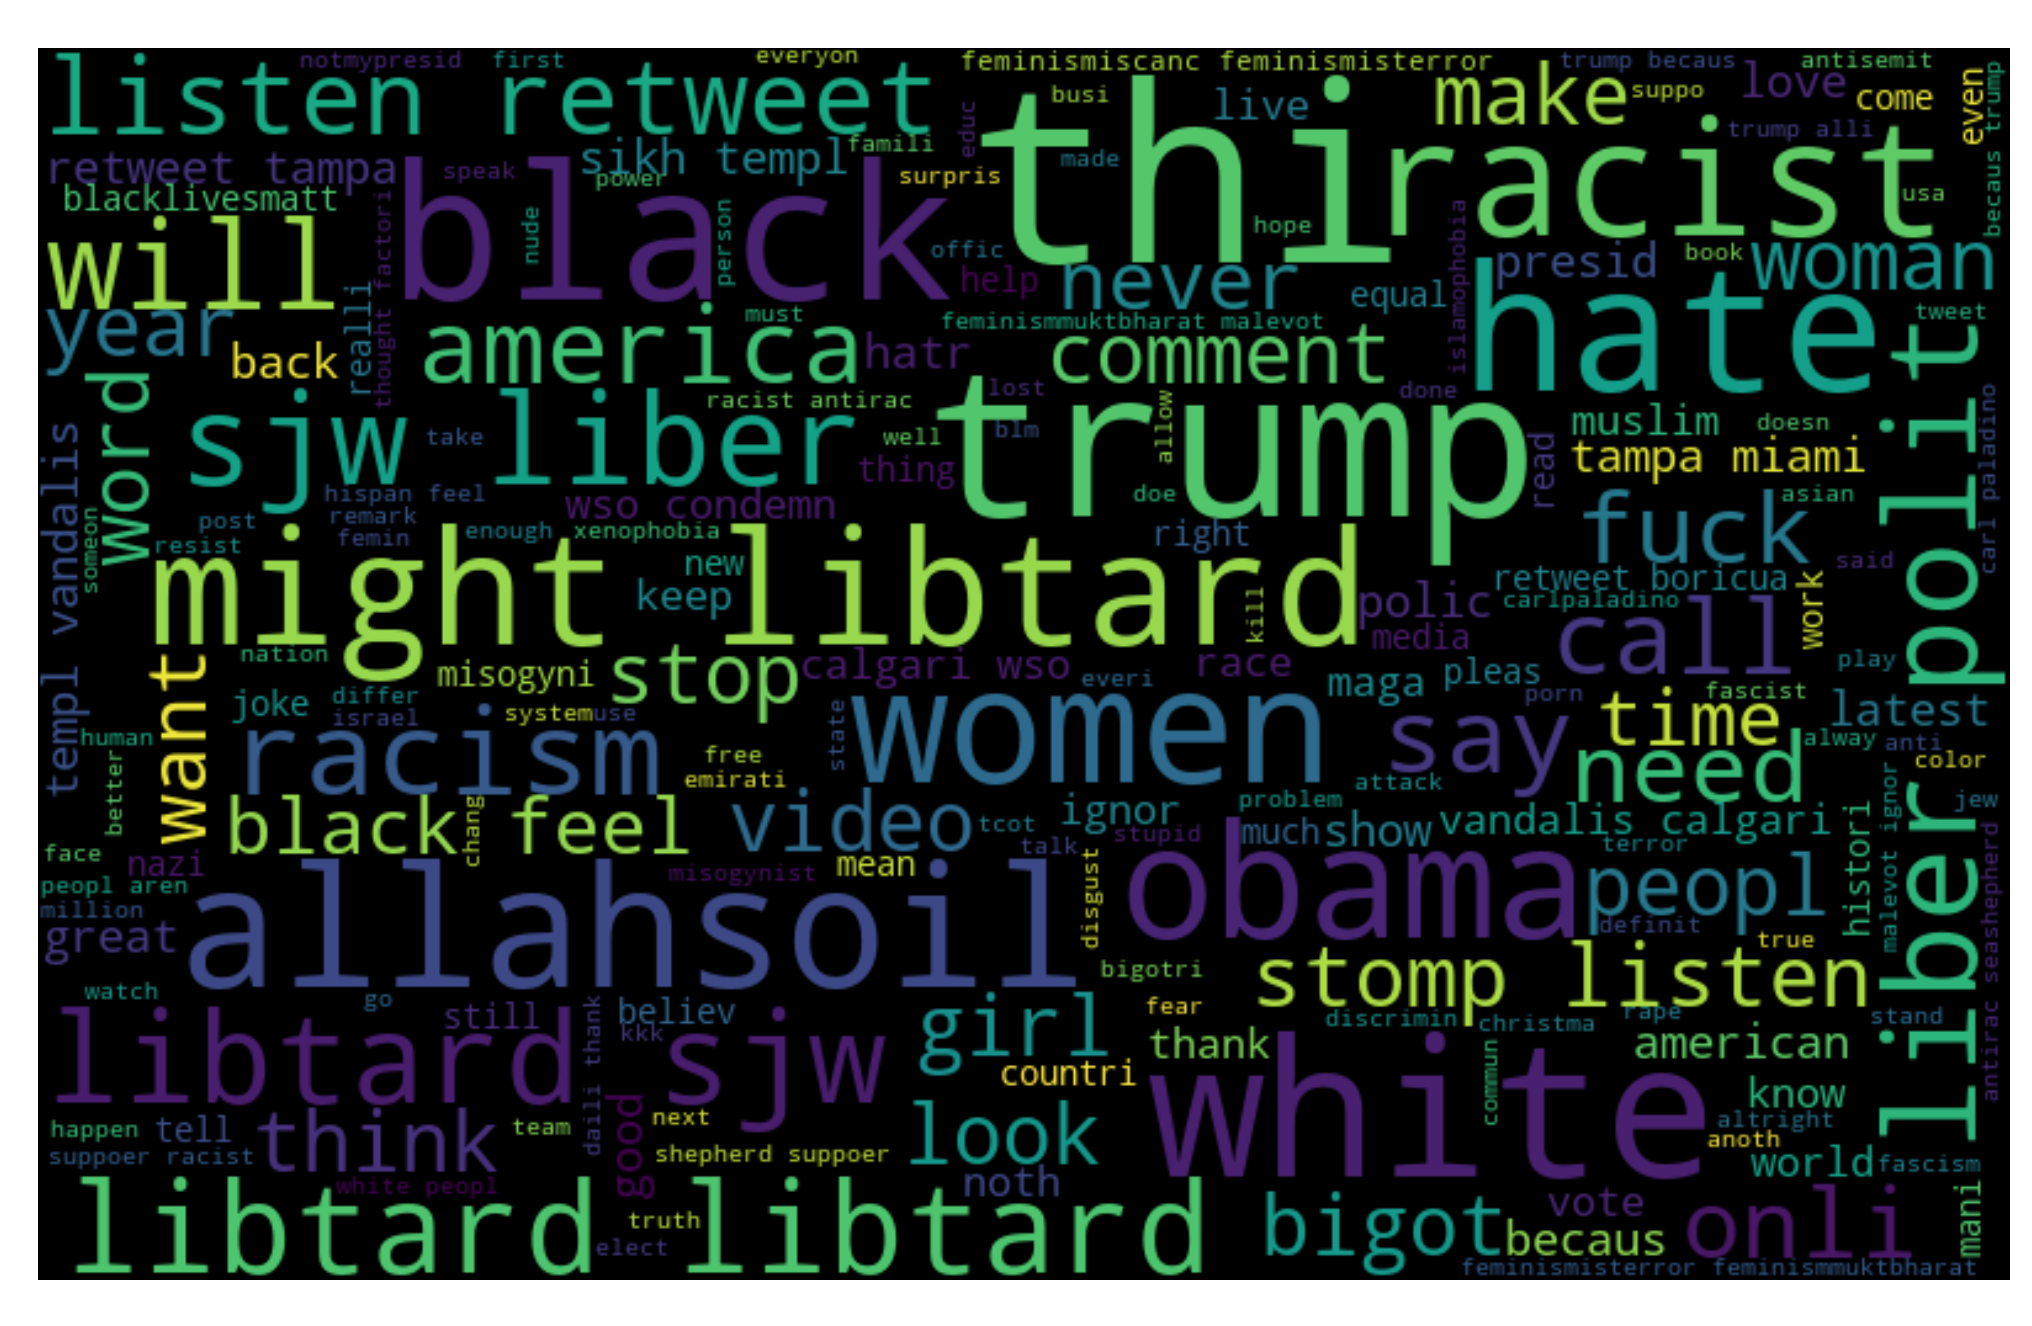

In [11]:
# Writing a function that can extract hashtags from a given tweet.
def hashtag_extract(tweets):
    hashtags = []
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags

In [13]:
# extract hashtags from positive sentiment tweets.
ht_positive = hashtag_extract(df['cleaned_tweet'][df['label']==0])

# extract hashtags from positive sentiment tweets.
ht_negative = hashtag_extract(df['cleaned_tweet'][df['label']==1])

In [14]:
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [16]:
# Showing first five positive and negative sentiment hashtags.
print(ht_positive[:5])
print(ht_negative[:5])

['run', 'lyft', 'disapoint', 'getthank', 'model']
['cnn', 'michigan', 'tcot', 'australia', 'opkillingbay']


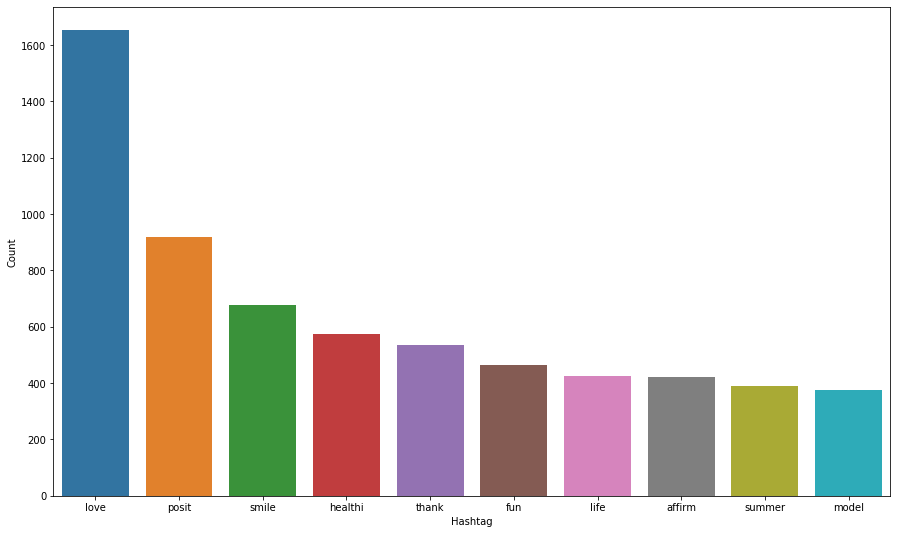

In [18]:
# calculating the frequency of each positive hashtag and plotting the top 10 hashtag.
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')

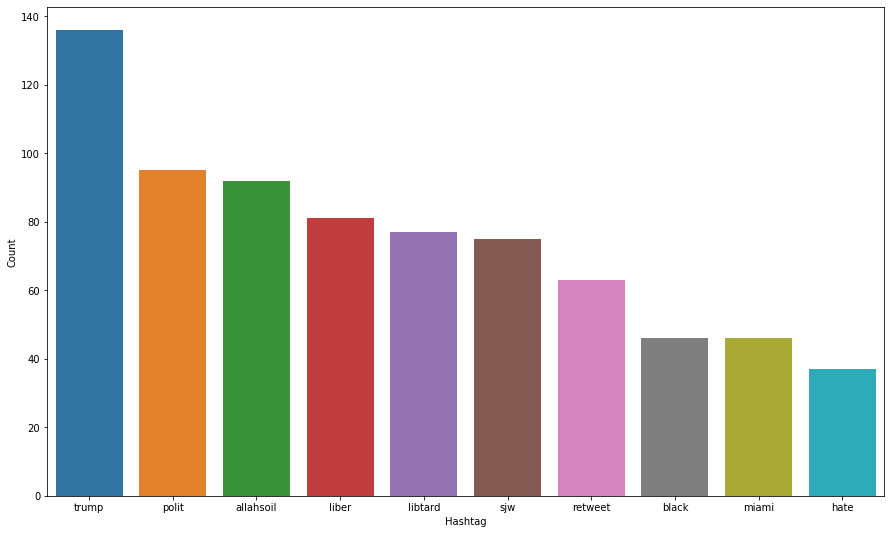

In [19]:
# calculating the frequency of each positive hashtag and plotting the top 10 hashtag.
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')

### ML model training and evaluation.

In [21]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['cleaned_tweet'])

In [22]:
# splitting the data into training and test set.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['label'], random_state=42, test_size=0.25)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
# testing and getting f1 score.
y_pred = model.predict(x_test)
f1_score(y_test,y_pred)

0.5017667844522968

In [27]:
# getting the accuracy score.
accuracy_score(y_test,y_pred)

0.9470654486297084

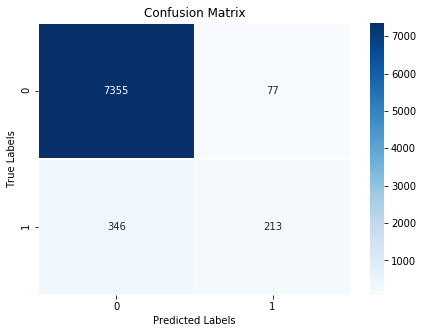

In [28]:
#plotting the confusion matrix.
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(data=cm,annot=True,cmap="Blues",linewidths=0.5,fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show();